![image](./binom_exx.png)

![image](./binom.png)


4	Diskrétní rozdělení pravděpodobnosti  


Př. 6: Pravděpodobnost narození děvčete je 0.49. Určete pravděpodobnost, že ve třídě mající 25 dětí bude (neuvažujte jednopohlavní třídy):
a)	Právě 10 dívek,
b)	Alespoň 10 a více dívek,
c)	Více než 15 dívek,
d)	Kolik dívek bude ve třídě nejpravděpodobněji.
Nakreslete graf, kde bude vynesena pravděpodobnost počtu dívek ve třídě.

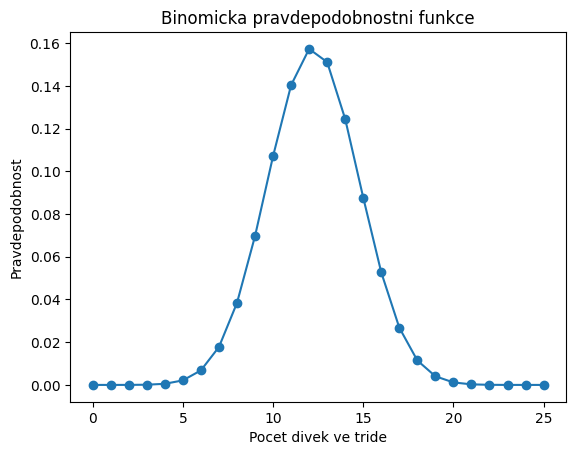

a) Právě 10 dívek: 0.10712639160533607
b) Alespoň 10 a více dívek: 0.8645719907950425
c) Více než 15 dívek: 0.09643028477689075
d) Kolik dívek bude ve třídě nejpravděpodobněji: 12


In [5]:
import math
import numpy as np

# tenhle python a matlab kod funguje !!!!

# matlab code:
# n = 25; p = 0.49;
# x = 0:n;
# y = binopdf(x,n,p);
# plot(x,y,'o-')
# xlabel('Pocet divek ve tride')
# ylabel('Pravdepodobnost')
# title('Binomicka pravdepodobnostni funkce')

n = 25
p = 0.49
x = np.arange(0, n+1)
y = np.zeros(n+1)

for i in range(n+1):
    y[i] = math.comb(n, i) * p**i * (1-p)**(n-i)
    
import matplotlib.pyplot as plt
plt.plot(x, y, 'o-')
plt.xlabel('Pocet divek ve tride')
plt.ylabel('Pravdepodobnost')
plt.title('Binomicka pravdepodobnostni funkce')
plt.show()

# a) Právě 10 dívek
print('a) Právě 10 dívek:', y[10])
# matlab code:
# binopdf(10,n,p)

# b) Alespoň 10 a více dívek
print('b) Alespoň 10 a více dívek:', sum(y[10:]))
# matlab code:
# 1 - binocdf(9,n,p) 

# c) Více než 15 dívek
print('c) Více než 15 dívek:', sum(y[16:]))
# matlab code:
# 1 - binocdf(15,n,p)

# d) Kolik dívek bude ve třídě nejpravděpodobněji
print('d) Kolik dívek bude ve třídě nejpravděpodobněji:', x[np.argmax(y)])
# matlab code:
# x(find(y == max(y)))

Př. 8a: Mějme mariášové karty (32 karet, které obsahují 4 esa, 4 krále, 4 filky,…, 4 sedmičky). Losujete karty z balíčku a vracíte je zpět. Určete pravděpodobnost, že z prvních 7 vylosovaných karet dostanete právě 4 esa nebo krále. A poslední osmá vylosovaná karta bude 7.  
[0.0072]


In [15]:
# matlab code:
# binopdf(4,7,8/32) * 4/32

# 2 deje se stanou naraz -- nasobim pravdepodobnost ze 7 karet vylosovat 4 esa nebo krale a pravdepodobnost ze 8 karta bude 7

# nebo
# binopdf(4,7,8/32) * binopdf(1,1,4/32)

n = 7
p = 8/32
    
print('Pravděpodobnost, že z prvních 7 vylosovaných karet dostanete právě 4 esa nebo krále:', math.comb(n, 4) * p**4 * (1-p)**(n-4) * 4/32)

Pravděpodobnost, že z prvních 7 vylosovaných karet dostanete právě 4 esa nebo krále: 0.00720977783203125


![image](./hypergeom.png)

Př. 11: V loterii je v osudí 200 čísel, z nichž se losuje 30. Jaká je pravděpodobnost, že vybereme-li náhodně 10 čísel, bude z nich právě 5 vylosovaných. Řešte 
a)	Pomocí hypergeometrického rozdělení,
b)	Aproximací na binomického rozdělení,
c)	Kolik čísel uhádneme nejpravděpodobněji.


In [17]:
# a)	Pomocí hypergeometrického rozdělení
# matlab code:
# hygepdf(5,30,200,10)

N = 200
n = 30
x = 10
k = 5
print('a) Pomocí hypergeometrického rozdělení:', math.comb(n, k) * math.comb(N-n, x-k) / math.comb(N, x))

# b)	Aproximací na binomického rozdělení 
# matlab code:
# binopdf(5,10,30/200)

p = n/N
print('b) Aproximací na binomického rozdělení:', math.comb(x, k) * p**k * (1-p)**(x-k))
    
# c)	Kolik čísel uhádneme nejpravděpodobněji
# matlab code:
# x(find(binopdf(x,10,30/200) == max(binopdf(0:10,10,30/200)))

x = np.arange(0, 11)
y = np.zeros(11)
    
for i in range(11):
    y[i] = math.comb(10, i) * p**i * (1-p)**(10-i)
    
print('c) Kolik čísel uhádneme nejpravděpodobněji:', x[np.argmax(y)])

# python a matlab kod je OK


a) Pomocí hypergeometrického rozdělení: 0.007077593210915365
b) Aproximací na binomického rozdělení: 0.008490855786328123
c) Kolik čísel uhádneme nejpravděpodobněji: 1


Zásilka obsahuje 80 % kvalitních a 20 % nekvalitních výrobků. Náhodně s vracením vybereme 5 výrobků. Určete pravděpodobnost, že:
a)	právě 3 budou kvalitní,
b)	alespoň 3 budou kvalitní
[0.2048, 0.9421]


In [19]:
# matlab code:
# binopdf(3,5,0.8)

n = 5
p = 0.8

print('a) právě 3 budou kvalitní:', math.comb(n, 3) * p**3 * (1-p)**(n-3))

# matlab code:
# 1 - binocdf(2,5,0.8)

print('b) alespoň 3 budou kvalitní:', 1 - sum([math.comb(n, i) * p**i * (1-p)**(n-i) for i in range(3)]))

a) právě 3 budou kvalitní: 0.20479999999999993
b) alespoň 3 budou kvalitní: 0.94208


Př. 13: Házíte kostkou. Určete pravděpodobnost, že právě u pátého hodu Vám padne poprvé šestka.
[0.0804]


In [23]:
# matlab code:

# 5/6 * 5/6 * 5/6 * 5/6 * 1/6

p = 1/6
print('Pravděpodobnost, že právě u pátého hodu Vám padne poprvé šestka:', (1-p)**4 * p)

# pomoci hypergeometrickeho rozdeleni
# matlab code:
# geopdf(4, 1/6); # tohle ai nevygenerovalo spravne, toto reseni je ok, ale nebylo vygenerovano ai

# nbinpdf(4,1,1/6)





Pravděpodobnost, že právě u pátého hodu Vám padne poprvé šestka: 0.08037551440329219


Př. 15: Distributor prodává knihu. 10 % knihkupců ji zakoupí. Jaká je pravděpodobnost, že distributor bude poprvé úspěšný:
a)	Právě u 5 návštěvy knihkupectví,
b)	Do 5 návštěvy (5. již neuvažujeme),
c)	Při osmé a více návštěvě. 
[0.0656, 0.3439, 0.4783]


In [29]:
# matlab code:
# geopdf(4, 0.1)

p = 0.1
print('a) Právě u 5 návštěvy knihkupectví:', (1-p)**4 * p)

# matlab code:
# 1 - geocdf(4, 0.1)

# do 5. návštěvy (5. již neuvažujeme)
# b)
# geocdf(3.5, 0.1)

# c)
# 1 - geocdf(6.5, 0.1)

# geometrickou pravdepodobnost moc ai neumi
# tyto priklady reseni jsou ok, ale nebyly vygenerovany ai

    

a) Právě u 5 návštěvy knihkupectví: 0.06561
b) Do 5 návštěvy (5. již neuvažujeme): 0.40950999999999993


4.5	Negativně binomické rozdělení
Př. 15a: Pravděpodobnost výskytu krevní skupiny A+ je 0.35. V nemocnici potřebují najít 3 dárce s touto krevní skupinou. Dárcové však neznají svojí krevní skupinu. Jaká je pravděpodobnost, že pro nalezení právě 3. dárce s krevní skupinou A+ budou muset vyšetřit:
a)	právě 10 dárců,
b)	více jak 9 dárců,
c)	aspoň 6 (včetně) a nejvýše 10 dárců (včetně).

Obdobný příklad, ale chceme vědět, že mezi 10 dárci budou právě 3 s krevní skupinou A+.
[0.0757,0.3373,0.5032, 0.2522] 


In [39]:
# rodil mezi binom a nbinom => binom bere pouze prvni prvek co je nalezen a spocita jeho pravdepodobnost
# nbinom bere vsechny prvky a spocita pracdepodobnost ze vsech

# matlab code:
# nbinpdf(3,3,0.35); chudoba napsal ze: nbinpdf(7,3, 0.35)

p = 0.35
r = 3
    
print('a) právě 10 dárců:', math.comb(10-1, 3-1) * p**r * (1-p)**(10-r))

# b
# matlab code:
# 1 - nbinocdf(6,3,0.35); chudoba source


# c
# matlab code:
# nbincdf(7,3,0.35) - nbincdf(2,3,0.35)

a) právě 10 dárců: 0.07566588749179688


In [ ]:
# pois pdf



Priklad 5:
V bylinkové cajovne „Materidouska" pracujf 4 smeny. Majitel oblibené cajovny má podezrení, ze
nekterá ze smen ho sidi a nepfiznává mu celou tribu (proste a jané - nosí si svoje bylinky do
podniku). Sledoval tedy poet prodaných cajü v jednotlivých smenách a dal za kol synkovi studujici
na FM, zda by mu mohl statisticky zjistit, zda nejaká smena ho sidí, ci nikoliv.
Potet prodanych caju za smenu je následujicí:
A=(52, 48, 56, 62,65, 71, 58, 62, 57, 61, 58, 61, 35, 67, 74, 78] B=(53,47,51,56,64,51,47,59,58,63,64,65,67,68,69,70,52,54] C=(48,49,52,51,54,56,58,51,57,59,62,65,61,60,52,57,59,63]
D=(28,31,29,35,37,34,41,28,26,25,24,32,31,30,29,27,21,19]
Urete na hladine vznamnosti 5 %, zda vechny smeny prodávaji stejné mnoství caju. Otestujte
predpoklady, piste hypotézy, na základe predpokladu vyberte vhodný test, ucinte záver.

The Lilliefors test, also known as the Lilliefors corrected Kolmogorov-Smirnov test, is a statistical test used to assess whether a given sample comes from a population with a specific distribution, typically normal distribution. It is a modification of the Kolmogorov-Smirnov test and is used when the parameters of the population distribution, such as the mean and standard deviation, are estimated from the sample itself rather than known in advance.

The Lilliefors test is particularly useful when working with small sample sizes or when the population parameters are unknown and need to be estimated from the sample data. It provides a way to test the goodness of fit of a sample to a theoretical distribution, such as normal distribution, by comparing the empirical cumulative distribution function (ECDF) of the sample with the theoretical cumulative distribution function (CDF) of the specified distribution.

The null hypothesis of the Lilliefors test is that the sample comes from the specified distribution. If the p-value resulting from the test is less than a chosen significance level (e.g., 0.05), then there is evidence to reject the null hypothesis, suggesting that the sample does not come from the specified distribution.

Overall, the Lilliefors test is a useful tool for assessing the goodness of fit of a sample to a specified distribution, especially when the population parameters are unknown or when dealing with small sample sizes.


In [44]:
from scipy.stats import kstest
from scipy.stats import norm
import numpy as np

# Sample data
A = [52, 48, 56, 62, 65, 71, 58, 62, 57, 61, 58, 61, 35, 67, 74, 78]
B = [53, 47, 51, 56, 64, 51, 47, 59, 58, 63, 64, 65, 67, 68, 69, 70, 52, 54]
C = [48, 49, 52, 51, 54, 56, 58, 51, 57, 59, 62, 65, 61, 60, 52, 57, 59, 63]
D = [28, 31, 29, 35, 37, 34, 41, 28, 26, 25, 24, 32, 31, 30, 29, 27, 21, 19]




from scipy.stats import kruskal

# Sample data
A = [52, 48, 56, 62, 65, 71, 58, 62, 57, 61, 58, 61, 35, 67, 74, 78]
B = [53, 47, 51, 56, 64, 51, 47, 59, 58, 63, 64, 65, 67, 68, 69, 70, 52, 54]
C = [48, 49, 52, 51, 54, 56, 58, 51, 57, 59, 62, 65, 61, 60, 52, 57, 59, 63]
D = [28, 31, 29, 35, 37, 34, 41, 28, 26, 25, 24, 32, 31, 30, 29, 27, 21, 19]

# Perform Kruskal-Wallis H test
statistic, p_value = kruskal(A, B, C, D)

# Output results
print("Kruskal-Wallis H test:")
print("Statistic:", statistic)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("There is a statistically significant difference between at least one pair of shifts.")
else:
    print("There is no statistically significant difference between any pairs of shifts.")


Kruskal-Wallis H test:
Statistic: 40.65875750994028
p-value: 7.724898145697542e-09
There is a statistically significant difference between at least one pair of shifts.
